
# Apunts algorísmica avançada: Grafs
## Aniol Garcia i Serrano
___
Col·lecció d'algorismes, funcions i alguna pinzellada de teoria

### Índex:
* [Random Walk](#random_walk)
* [DFS](#dfs)
* [BFS](#bfs)
* [Dijkstra](#dijkstra)
* [Matriu de Distàcines](#mat)
* [Bellman-Ford](#bell_ford)


___
### <a name="random_walk"></a>Random Walk

In [4]:
from random import choice
import networkx as nx

def random_walk(G, origen, desti, repeat=False):
    cami = [origen]
    expanded = 1
    visited = dict((node, 0) for node in G.nodes())
    
    while cami[-1] != desti: #Mentre l'últim node visitat no sigui el que busquem
        neighbors = [node for node in G.neighbors(cami[-1]) if repeat or node not in cami] #llista de nodes adjacents a l'ultim que no hagin estat visitats (en cas que no es permeti repetir)
        if not neighbors: #Si no té veíns (només en cas que repeat = False o graf disconnex) no podem trobar camí
            cami = []
            expanded = -1
            break
        node = choice(neighbors) #Agafem un node adjacent aleatori, l'afegim al camí, i sumem 1 al contador total de nodes i al de vegades visitat.
        cami.append(node)
        visited[node] += 1
        expanded += 1
        
        
    return {
        'path' : cami,
        'expanded' : expanded,
        'frequence': visited
    }

___
### <a name="dfs"></a>DFS
Recorregut per prefunditat. Arriba fins al final d'una branca abans de comançar-ne una altra.

In [5]:
'''DFS per a trobar camins de nodes'''
def dfs(G, origen, desti, depth=0):  
    parent = {origen: None}
    stack = [origen]
    visited = dict((node, False) for node in G.nodes())
    visited[origen] = True
    while stack:
        if visited[desti]:
            break
        x = stack.pop()
        for y in G.neighbors(x):
            if not visited[y]:
                visited[y] = True
                parent[y] = x
                stack.append(y)
        
    path = [desti]
    anterior = parent[desti]
    while anterior:
        path.append(anterior)
        anterior = parent[anterior]   
    
    return {
        'path' : path,
        'expanded' : len(path)
    }

'''DFS per explorar tot el graf'''
def dfs_complete(G, origen):
    parent = {origen: None}
    stack = [origen]
    visited = dict((node, False) for node in G.nodes())
    visited[origen] = True
    while stack:
        x = stack.pop()
        for y in G.neighbors(x):
            if not visited[y]:
                visited[y] = True
                parent[y] = x
                stack.append(y)
        
    return parent

De manera alternativa, podem definir el DFS recursiu, fent servir la pila d'execució del sistema en lloc de fer una pila nosaltres mateixos. Si guardem l'ordre en què s'executa DFS sobre un node d'un graf dirigit acíclic (DAG) tindrem la ordenació topològica (o linearització) del graf.

In [6]:
'''Implementació de DFS recursiu que retorna el topological sort, les components connexes i els punters a pare'''

def DFS(G):
    parent = {}
    components = []
    topo = []
    for node in G.nodes():
        if node not in parent:
            components.append(list())
            components[-1].append(node)
            parent[node] = None
            DFS_recursive(G, node, parent, components, topo)
    topo.reverse()
    return {
        'topo': topo, #Topological sort (ONLY for directed acyclic graphs)
        'components': components, #Connected components (ONLY for undirected graphs)
        'parents': parent #Immediate parents for every node
    }


def DFS_recursive(G, node, parent, components, topo):
    for neighbor in G.neighbors(node):
        if neighbor not in parent:
            components[-1].append(neighbor)
            parent[neighbor] = node
            DFS_recursive(G, neighbor, parent, components, topo)
    topo.append(node)


In [7]:
G = nx.DiGraph()
G.add_nodes_from([1,2,3,4,5,6,7])
G.add_edges_from([(1,2),(2,3),(2,4),(2,5),(3,5),(4,5),(5,6),(7,4)])
nx.draw_circular(G, with_labels=True)
DFS(G)

{'topo': [7, 1, 2, 4, 3, 5, 6],
 'components': [[1, 2, 3, 5, 6, 4], [7]],
 'parents': {1: None, 2: 1, 3: 2, 5: 3, 6: 5, 4: 2, 7: None}}

{'topo': [6, 1, 2, 4, 5, 3],
 'components': [[1, 2, 4, 3, 5], [6]],
 'parents': {1: None, 2: 1, 4: 2, 3: 4, 5: 4, 6: None}}

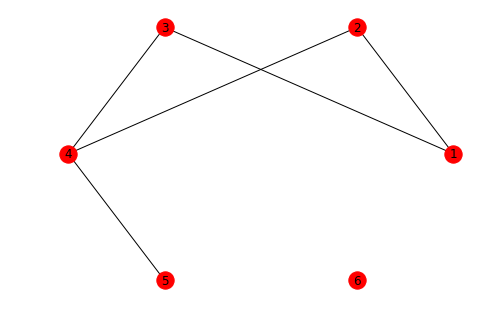

In [8]:
G3 = nx.Graph()
G3.add_nodes_from([1,2,3,4,5,6])
G3.add_edge(1,2)
G3.add_edge(1,3)
G3.add_edge(2,4)
G3.add_edge(3,4)
G3.add_edge(4,5)
nx.draw_circular(G3,with_labels = True)
DFS(G3)

Podem fer dues execucions de DFS per trobar components altament connexes en un graf dirigit. Fem DFS una primera vegada per trobar l'ordenació topològica del graf, transposem el graf, és a dir canviem la direcció de cada una de les arestes del graf dirigit (noteu que fent això les components altament connexes ho seguiexen essent) i fem DFS en l'ordre de la primera ordenació topològica. La complexitat d'aquest algorisme és de $O(|V|+|E|)$, ja que són dues execucions de DFS més invertir un graf, que és $O(|E|)$.

In [55]:
'''Algoritme de Kosaraju per a trobar components connexes. Veure explicació de dalt'''
def strongly_connected(G):
    dfs1 = DFS(G)
    G_inv = G.reverse()
    parent2 = {}
    components2 = []
    topo2 = []
    for node in dfs1['topo']:
        if node not in parent2:
            components2.append(list())
            components2[-1].append(node)
            parent2[node] = None
            DFS_recursive(G_inv, node, parent2, components2, topo2)
    return components2   

[[8], [6, 7], [3, 4], [1, 2, 5]]

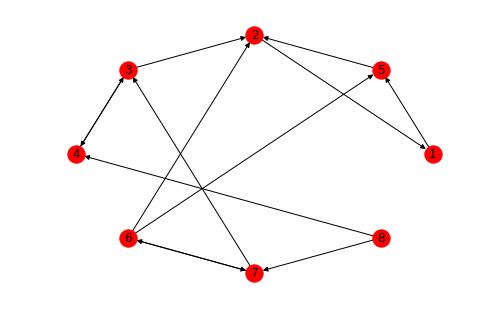

In [61]:
G = nx.DiGraph()

#G.add_edges_from([(1,2),(2,3),(2,4),(2,5),(3,5),(4,5),(5,6),(6,2),(6,3),(7,4)])
G.add_edges_from([(1,5),(2,1),(3,2),(3,4),(4,3),(5,2),(6,2),(6,5),(6,7),(7,3),(7,6),(8,4),(8,7)])
nx.draw_circular(G, with_labels=True)
strongly_connected(G)

In [41]:
G = nx.DiGraph.reverse

In [ ]:
G = nx.DiGraph.reverse

___
### <a name="bfs"></a>BFS
Literalment DFS iteratiu amb una cua en lloc d'una stack. Recorre el graf per amplada en lloc de fer-ho per profunditat, de manera que visitarà tots els nodes que estiguin a distància 1 aresta de l'origen, després els de distància 2 arestes...

In [11]:
'''Implementació a la meva manera'''
def bfs(G, origen, desti):   
    parent = {origen: None}
    queue = set([origen])
    visited = dict((node, False) for node in G.nodes())
    visited[origen] = True
    while queue:
        seguent = set()
        if visited[desti]:
            break
        for x in queue:
            for y in G.neighbors(x):
                if not visited[y]:
                    visited[y] = True
                    parent[y] = x
                    seguent.add(y)
        queue = seguent
    
    dist = 0
    path = [desti]
    anterior = parent[desti]
    while anterior:
        path.append(anterior)
        anterior = parent[anterior]
        dist += 1
        
    return {
        'dist': dist,
        'path' : path,
        'expanded' : len(path)
    }

'''Implementació amb cua'''
def bfs2(G, origen):
    parent = {origen: None}
    queue = [origen]
    visited = dict((node, False) for node in G.nodes())
    visited[origen] = True
    while queue:
        x = queue.pop(0)
        for y in G.neighbors(x):
            if not visited[y]:
                visited[y] = True
                parent[y] = x
                queue.append(y)
    return parent

In [12]:
G = nx.generators.barabasi_albert_graph(100, 3)
print(bfs(G, 1, 95))
print(bfs2(G3, 1))

{'dist': 2, 'path': [95, 10, 1], 'expanded': 3}
{1: None, 2: 1, 3: 1, 4: 2, 5: 4}


___
### <a name="dijkstra"></a> DIJKSTRA
Retorna la distàncie entre un node inicial i un final. Si eliminem la restricció de parar al trobar el fina, ens dóna la distància entre un node i tota la resta de nodes del graf amb un cost de $O((|V|+|E|)log(|V|))$ en el cas de fer servir heap i $O(|V|^2)$ si ho fem directament.
ALERTA: Aquests algorismes estan fets per treballar amb la meva llibreria, s'han d'adaptar a nx!!

In [ ]:
from heapq import *
from util import *

'''Dijkstra amb heap, cost O(|V|+|E|)'''
def dijkstra_heap(G, origen, desti, infinity=float('inf')):
    final = {}
    queue = [(0, origen, None)]
    expanded = 0
    
    for i in G.nodes():
        final[i] = {"dist": infinity, "parent": None} 
    
    while queue:
        total_dist, node, parent = heappop(queue) #Treiem el node amb la minima distància acumulada, podem assegurar que la distància és mínima
        if final[node]["dist"] == infinity: #Si no l'hem visitat
            expanded += 1
            final[node]["dist"] = total_dist #Li posem la distància mínima final i guardem el pare
            final[node]["parent"] = parent
            if node == desti: #Si és el destí podem acabar
                break;
                
            for neighbour in G.neighbors(node): # Per a cada veí, si no ha estat visitat, posem al heap la distància
                if final[neighbour]["dist"] == infinity: 
                    #És possible que la distància que posem sigui superior a una ja trobada, però
                    #    s'assignarà la mínima quan la treiem del heap, de manera que sabrem que les
                    #    es treguin poteriorment pel mateix node seran més grans.
                    heappush(queue, (total_dist + G.edge[neighbour][node]["distance"], neighbour, node))
    
    path = []
    node = desti
    path.append(desti)
    while final[node]["parent"]:
        path.append(final[node]["parent"])
        node = final[node]["parent"]
    path = path[::-1]
    
    return{
        'path': path,
        'expanded': expanded,
        'distance': final[desti]["dist"]
    }

'''Dijkstra a sac per array, treient el mínim "manualment"'''
def dijkstra(G, origen, desti, infinity=float('inf')):    
    #Inicialitzem els contenidors que utilitzarem
    dist = {} #Distància i parent definitiu
    no_visitats = {} #Nodes no visitats i la seva distància provisional
    path = []
    expanded = 0
    
    #Definim la distància definitiva i provisional com a infinites 
    for i in G.nodes():
        dist[i] = {"dist":infinity, "parent":None}
        no_visitats[i] = infinity
    no_visitats[origen] = 0;
    
    while no_visitats:
        min_node = min(no_visitats, key=no_visitats.get) #Busquem el node no visitat amb la mínima distància a origen
        expanded += 1
        dist[min_node]["dist"] = no_visitats[min_node] 
        if min_node == desti: #Si és el que busquem podem parar, ja haurem trobat el camí mínim
            break;
        for node in G.neighbors(min_node): #Actualitzem la distància per a els que no tinguem distància mínima assegurada
            if node in no_visitats:
                if no_visitats[node] > no_visitats[min_node] + G.edge[node][min_node]["distance"]:
                    no_visitats[node] = no_visitats[min_node] + G.edge[node][min_node]["distance"]
                    dist[node]["parent"] = min_node
        no_visitats.pop(min_node) #ja té la distància mínima, el treiem de no visitats

    node = desti
    path.append(desti)
    while dist[node]["parent"]:
        path.append(dist[node]["parent"])
        node = dist[node]["parent"]
    path = path[::-1]
    
    return{
        'path': path,
        'expanded': expanded,
        'distance': dist[desti]["dist"]
    }

'''Dijkstra2 FUNCIONANT CORRECTAMENT (diria)'''
def dijkstra2(G, origen, desti, penalty=5000000, infinity=float('inf')):
    '''
    dijkstra2 es basa en dijkstra_heap amb la diferència que considerem nodes de línies diferents com a nodes diferents.
    D'aquesta manera la distància a un node pot ser diferent per a cada línia que hi arribi. En fer aquest canvi, saber
    quin és el parent d'un node ja no és tant senzill (segons la línia amb que haguem arribat a parent, el cost serà diferent),
    de manera que també posarem al heap la línia del pare i la guardarem. D'aquesta manera tenim informació sobre les dues últimes
    arestes i reconstruir el path és molt més senzill.
    '''
    #Final és un diccionari de la forma (node, línia per la que entrem):{"dist":distància per la línia d'entrada, "parent":node d'on venim, "line": línia amb la que arribem a parent}
    final = dict() 
    queue = []
    expanded = 0
       
    # Posem al heap els adjacents a l'origen per tal d'estalviar-nos casos especials amb la línia del pare
    for neighbor in G.neighbors(origen):
        heappush(queue, (G.edge[origen][neighbor]["distance"], neighbor, origen, G.edge[origen][neighbor]["line"]))
    
    while queue:
        total_dist, node, parent, parent_line = heappop(queue) #Treiem el nodeamb la minima distància acumulada
        current_line = G.edge[parent][node]["line"] #Calculem la línia per on hem vingut
        if not (node, current_line) in final.keys(): #Si no l'hem visitat
            final[(node, current_line)] = dict()
            final[(node, current_line)].update({"dist": total_dist, "parent": parent, "line": parent_line})
            
            if node == desti:
                break;
            expanded += 1
            
            for neighbour in G.neighbors(node):
                if (neighbour, G.edge[node][neighbour]["line"]) not in final.keys(): #Si no hem arribat a neighbor per aquesta línia
                    if G.edge[node][neighbour]["line"] != current_line: #Si hem hagut de canviar de línia afegim la penalització
                        heappush(queue, (total_dist + G.edge[neighbour][node]["distance"] + penalty , neighbour, node, current_line))
                    else:    
                        heappush(queue, (total_dist + G.edge[neighbour][node]["distance"], neighbour, node, current_line))

    path = []
    while node != origen:
        path.append(node)
        parent = final[(node, current_line)]["parent"]
        parent_line = final[(node, current_line)]["line"]
        node = parent 
        current_line = parent_line       
        
    path.append(origen)
    path = path[::-1]
    return{
        'path': path,
        'expanded': expanded,
        'distance': total_dist
    }

***
### <a name="mat"></a> Matriu de distàncies
Per la matriu de distàncies hem fet una viarant de l'algorisme de Dijkstra estàndard. Hem tret la optimització que havíem fet a Dijkstra per tal que parés al trobar el node final, de manera que ara seguirà fins a tenir la distància mínima entre el node inicial i la resta de nodes del graf. Amb això passem d'haver de fer $|V|^2$ execucions de dijkstra (cada parella de nodes) a haver-ne de fer $|V|$. Això, però, podem millorar-ho. Suposem que hem calculat la distància de  $v$ a tota la resta de nodes i ara ens disposem a calcular la distància de $u$ a la resta de nodes. Coneixem la distància de $v$ a $u$, de manera que no ens cal calcular-la altre cop. D'aquesta manera l'execució de dijkstra inicial es farà sobre $|V|$ nodes, però la segona sobre $|V|-1$, la tercera sobre $|V|-2$ i així successivament. En el pitjor dels casos en estalviar-nos de calcular un node ens estalviem de calcular una única aresta, així que el nombre d'arestes també va decrementatnt en 1. D'aquesta manera, el cost és de $\sum_{i=0}^{|V|-1}((|E|-i)+(|V|-i))log(|V|-i)$. Tot i així, aproximant a l'alça, la complexitat serà de l'ordre de $|V|$ vegades dijkstra1, és a dir de l'ordre de $O(|V|((|E|+|V|)log(|V|))) = O(|V||E|log(|V|) + |V|^2 log(|V|))$ 

In [65]:
def dist_mat(G):
    infinity=float('inf')
    mat = dict((node, dict(((node,infinity) for node in G.nodes()))) for node in G.nodes()) #Inicialitzem la matriu
    
    #Fem execució de dijkstra per a cada node
    for origen in G.nodes(): 
        final = {}
        
        #Si ja coneixem la distància, la posem com a calculada. En cas contrari és infinit
        for node in G.nodes(): 
            final[node] = mat[origen][node]
        queue = [(0, origen)]
        
        while queue:
            dist, node = heappop(queue)
            #El node que treiem del heap té distància mínima coneguda i el guardem a la matriu si no en tenim una millor
            if final[node] == infinity:
                final[node] = dist
                mat[origen][node] = dist
                mat[node][origen] = dist
                
                for neighbor in G.neighbors(node):
                    if final[neighbor] == infinity:
                        heappush(queue, (dist + G.edge[node][neighbor]["distance"], neighbor))     
    
    return mat

___
### <a name="bell_ford"></a> Bellman-Ford
Bellman-Ford és un Dijkstra que funciona per a grafs amb pesos negatius. El que fa és comprovar totes les arestes $|V|$ vegades (perquè el camí entre un node i un altre serà com a màxim de longitud $|V|-1$, amb excepció de cicles negatius). Fent una execució més (de cost |E|) podem comprovar si hi ha cicles negarius mirant si hi ha algun camí que es faci més petit. En cas afirmatiu, hi ha cicles de longitud negativa, de manera que es pot disminuir infinitament el cost d'un camí. El cost computacional és de $O(|V|\times|E|)$.

In [64]:
def bellman_ford(G, inici):
    dist = dict((node, float('inf')) for node in G.nodes())
    tree = dict((node, None) for node in G.nodes())
    
    #ATENCIÓ: es pot fer més eficient comprovant si en una iteració no es canvien les longituds
    for i in range(0, len(G.nodes()) -1):
        for node in G.nodes():
            for neighbor in G.neighbors(node):
                if dist[neighbor] > dist[node] + G.edge[node][neighbor]["distance"]:
                    dist[neighbor] = dist[node] + G.edge[node][neighbor]["distance"]
                    tree[neighbor] = node
                    
    #Una execució extra ens indica si hi ha cicles de pes negatiu
    for node in G.nodes():
            for neighbor in G.neighbors(node):
                if dist[neighbor] > dist[node] + G.edge[node][neighbor]["distance"]:
                    print("There are negative-weighted cycles!")
                    break
    return dist, tree
                